In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

sns.set()

np.set_printoptions(formatter={'float': lambda x: "{0:0.6f}".format(x)})

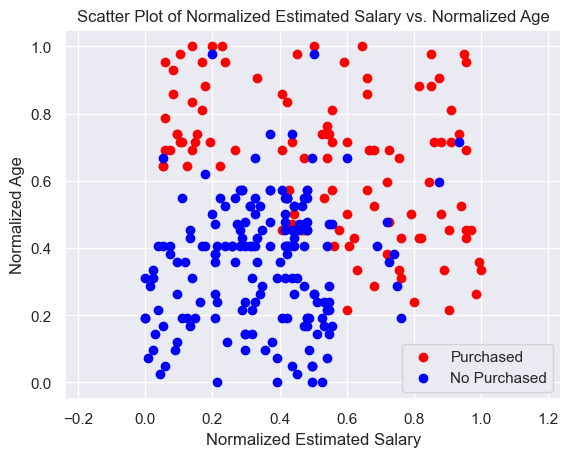

In [489]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the data from the CSV file
data = pd.read_csv("dataCompras.csv")
# Clean the input data
mean_salary = data['EstimatedSalary'].mean()
mean_age = data['Age'].mean()

data['EstimatedSalary'].fillna(mean_salary, inplace=True)
data['Age'].fillna(mean_age, inplace=True)
data["Purchased"].fillna(0, inplace=True)

# Select the features and the target variable
X = np.array(data[["EstimatedSalary", "Age"]]).reshape(-1,2)
Y = np.array(data["Purchased"]).reshape(-1,1)

# Normalize the features to the range [0, 1] using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3)

purchased_elements = Y_Train.reshape(-1) == 1
no_purchased_elements = Y_Train.reshape(-1) == 0

# Usar los índices para separar X en dos conjuntos
X_purchased = X_Train[purchased_elements]
X_no_purchased = X_Train[no_purchased_elements]

#plt.scatter(X_Train[:, 0], X_Train[:, 1], c=color_categories, label="Purchased")
plt.scatter(X_purchased[:,0],X_purchased[:,1], c='red', label="Purchased")
plt.scatter(X_no_purchased[:,0],X_no_purchased[:,1], c='blue', label="No Purchased")

# Label the X and Y axes and add a title to the plot
plt.xlabel("Normalized Estimated Salary")
plt.ylabel("Normalized Age")
plt.title("Scatter Plot of Normalized Estimated Salary vs. Normalized Age")

# Show a legend on the plot to indicate the categories
plt.legend()

# Adjust the aspect ratio so that the X and Y axes have the same scale
plt.axis("equal")

# Show the plot
plt.show()

Training finished


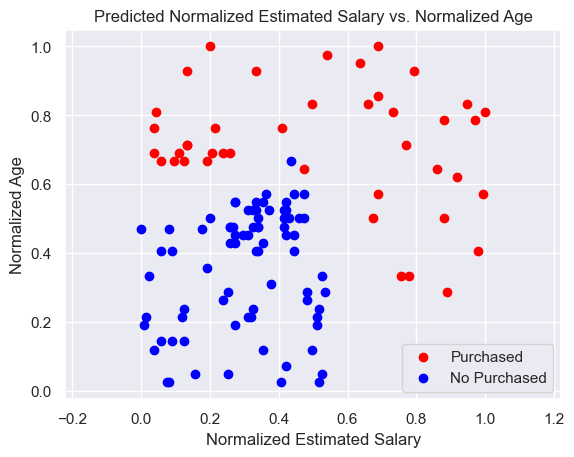

Error: 0.07228167955157669
Success rate: 91.67%


In [552]:
%run "MLP.ipynb"
mlp_model = MultilayerPerceptron([2,4,4,1])
mlp_model.train(X_Train,Y_Train,10000)

# Predict the test input values purchase probability
Y_Pred = mlp_model.forward(X_Test)

purchased_elements = Y_Pred.reshape(-1) > 0.5
no_purchased_elements = Y_Pred.reshape(-1) <= 0.5 

# Split the test data between purchased and no purchased
X_test_purchased = X_Test[purchased_elements]
X_test_no_purchased = X_Test[no_purchased_elements]

#Plot the predicted values
plt.scatter(X_test_purchased[:,0],X_test_purchased[:,1], c='red', label="Purchased")
plt.scatter(X_test_no_purchased[:,0],X_test_no_purchased[:,1], c='blue', label="No Purchased")
plt.xlabel("Normalized Estimated Salary")
plt.ylabel("Normalized Age")
plt.title("Predicted Normalized Estimated Salary vs. Normalized Age")
plt.legend()
plt.axis("equal")
plt.show()

#Plot the error (MSE) and success rate
print("Error: " + str(mlp_model.error(Y_Test,Y_Pred)))
total_error = np.abs(Y_Test-Y_Pred)
valid_prediction = total_error < 0.5
success_rate = np.mean(valid_prediction)
print(f"Success rate: {success_rate*100:.2f}%")

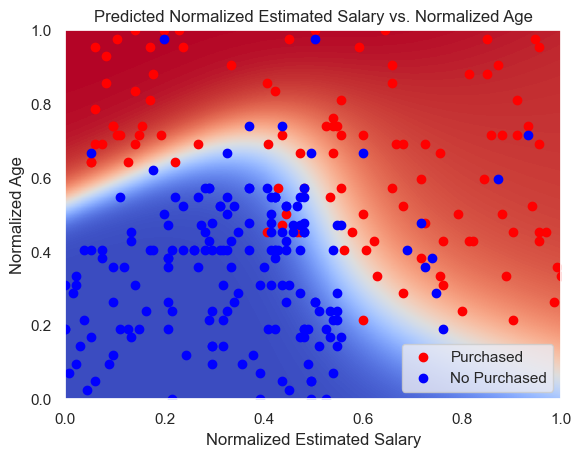

In [555]:
#Plotting the whole predictive space vs The train data set
resolution = 1000
mx = np.linspace(0,1,resolution)
my = np.linspace(0,1,resolution)
xmesh, ymesh = np.meshgrid(mx,my)
plane_mesh = np.concatenate((xmesh.reshape(-1,1),ymesh.reshape(-1,1)),axis=1)
plane_predict = mlp_model.forward(plane_mesh).reshape(resolution,resolution)
plt.pcolormesh(mx, my, plane_predict,cmap='coolwarm',shading='nearest')
plt.scatter(X_purchased[:,0],X_purchased[:,1], c='red', label="Purchased")
plt.scatter(X_no_purchased[:,0],X_no_purchased[:,1], c='blue', label="No Purchased")
plt.xlabel("Normalized Estimated Salary")
plt.ylabel("Normalized Age")
plt.title("Predicted Normalized Estimated Salary vs. Normalized Age")
plt.legend()
plt.show()